In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import calendar
from collections import Counter


In [62]:




data = pd.read_json("../data/merged_disorders_FILLED_WITH_SECTIONS1.json")


data.replace("", np.nan, inplace=True)

data_t = data.copy()





In [63]:
# Get the number of rows and columns
num_rows, num_cols = data.shape

print(f"The dataset has {num_rows} rows and {num_cols} columns.")

# Get the column names
col_names = data.columns

print(f"The column names are: {', '.join(col_names)}.")

summary = data.describe()

# Print the summary
print(summary)



The dataset has 685 rows and 11 columns.
The column names are: name, type, link, description, content, causes, symptoms, treatment, diagnosis, prevention, epidemiology.
                      name                   type  \
count                  685                    685   
unique                 685                     26   
top     Zellweger syndrome  neurological disorder   
freq                     1                    385   

                                           link  \
count                                       685   
unique                                      606   
top     https://en.wikipedia.org/wiki/Cathinone   
freq                                         11   

                                              description  \
count                                                 683   
unique                                                544   
top     Cathinone is a monoamine alkaloid found in the...   
freq                                                   11   

   

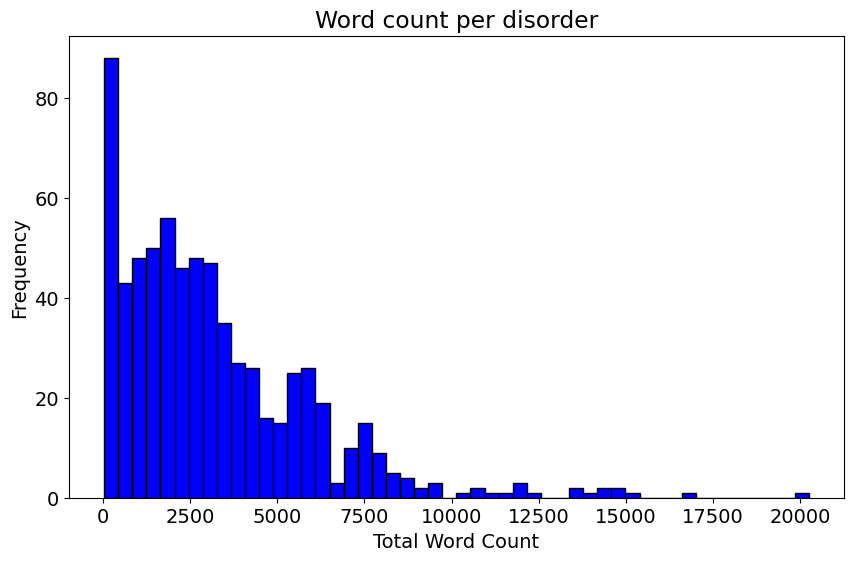

In [64]:
# Create a new column 'total_word_count' that contains the word count for each row considering all columns
data_t['total_word_count'] = data.apply(lambda x: sum(len(str(val).split(" ")) for val in x), axis=1)

# Plot a histogram of the total word counts
plt.figure(figsize=(10,6))
plt.hist((data_t['total_word_count']), bins=50, color='blue', edgecolor='black')
plt.title('Word count per disorder')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.show()

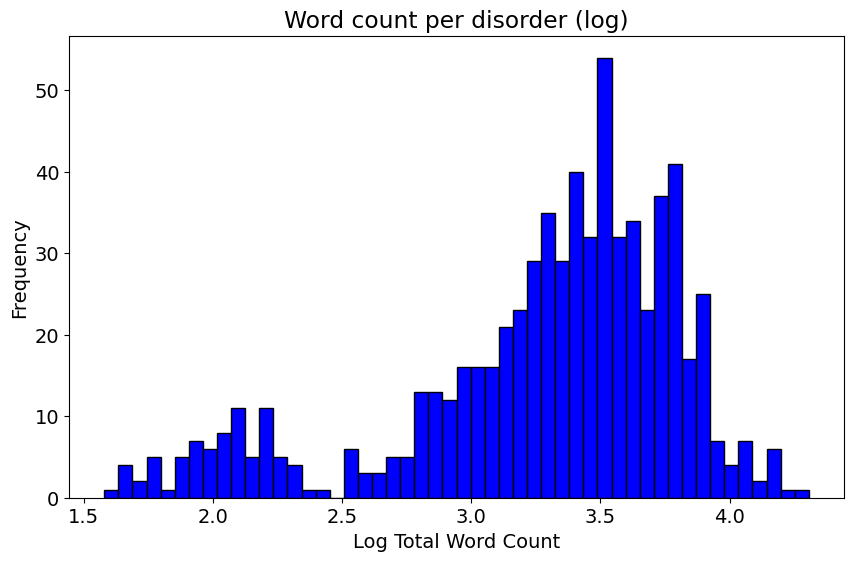

In [65]:
log_total_word_count = np.log10(data_t['total_word_count'])

plt.figure(figsize=(10,6))
plt.hist(log_total_word_count, bins=50, color='blue', edgecolor='black')
plt.title('Word count per disorder (log)')
plt.xlabel('Log Total Word Count')
plt.ylabel('Frequency')
plt.show()

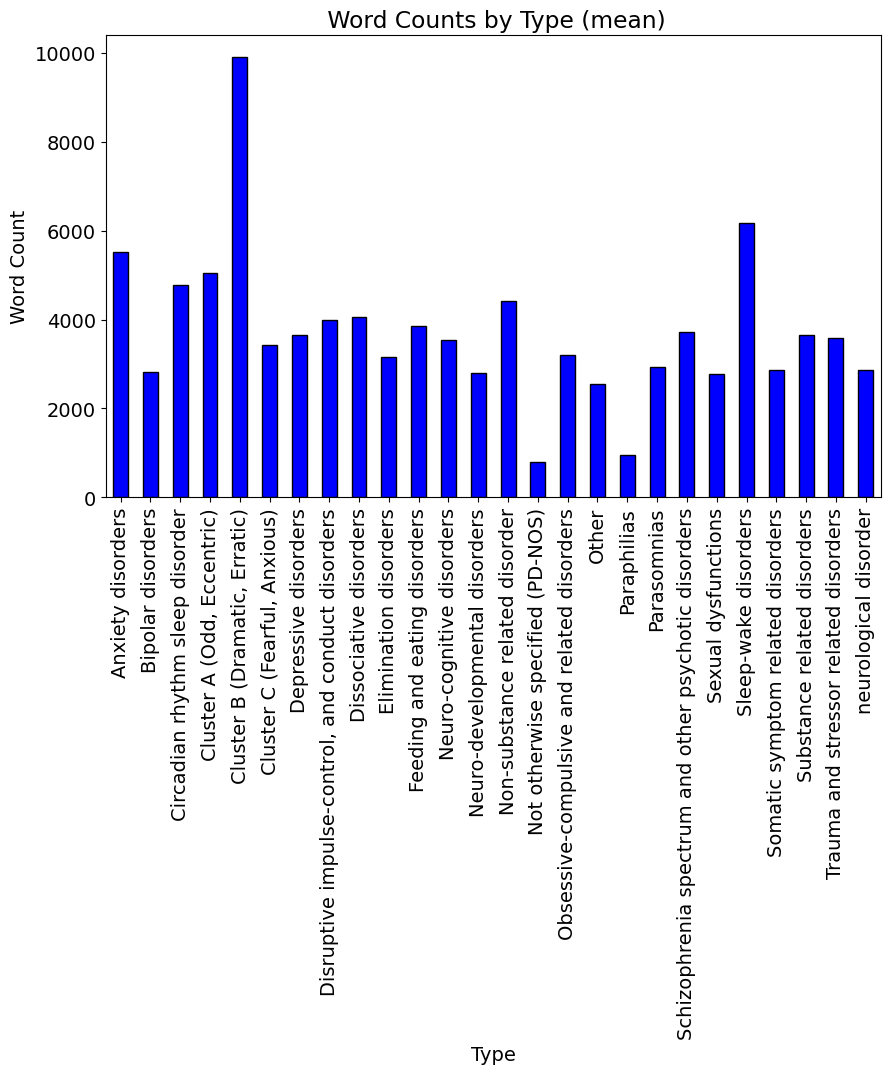

In [66]:





grouped_data = data_t.groupby('type')['total_word_count'].mean()


# Create a mean bar plot of the total word counts by type
plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', color='blue', edgecolor='black')
plt.title(' Word Counts by Type (mean)')
plt.xlabel('Type')
plt.ylabel('Word Count')
plt.show()

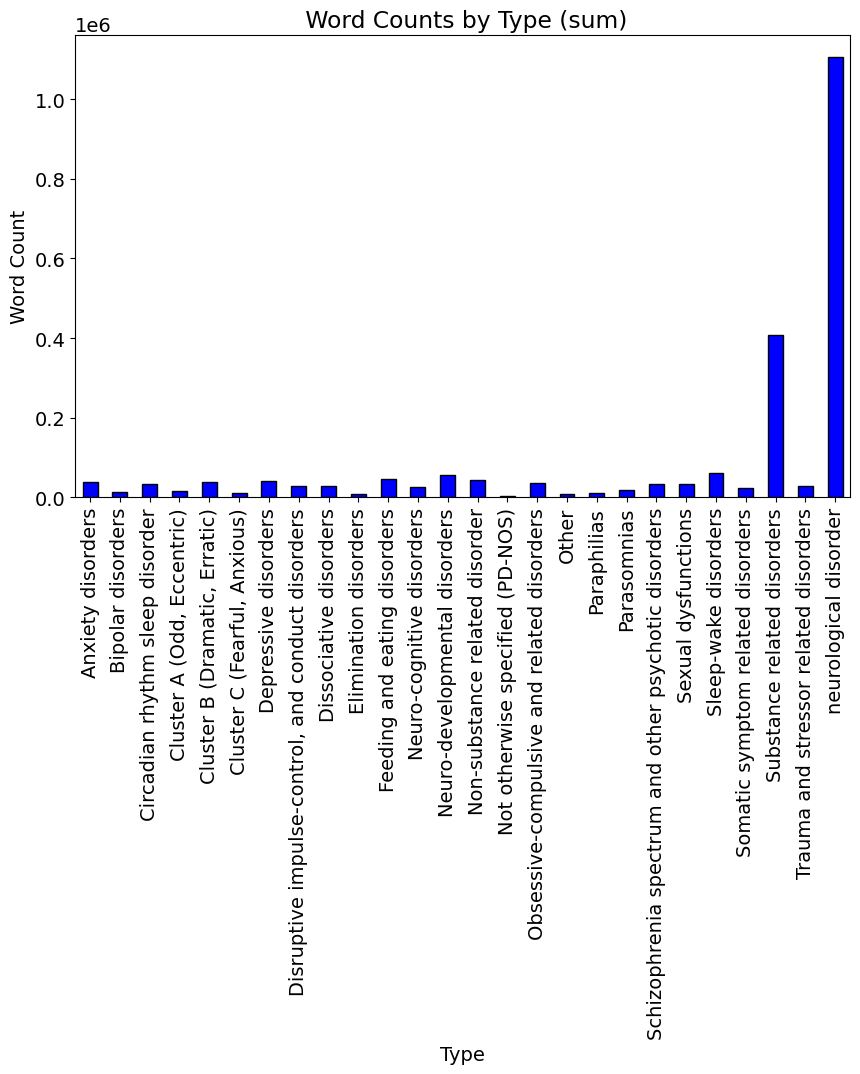

In [67]:
grouped_data = data_t.groupby('type')['total_word_count'].sum()


# Create a mean bar plot of the total word counts by type
plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', color='blue', edgecolor='black')
plt.title(' Word Counts by Type (sum)')
plt.xlabel('Type')
plt.ylabel('Word Count')
plt.show()

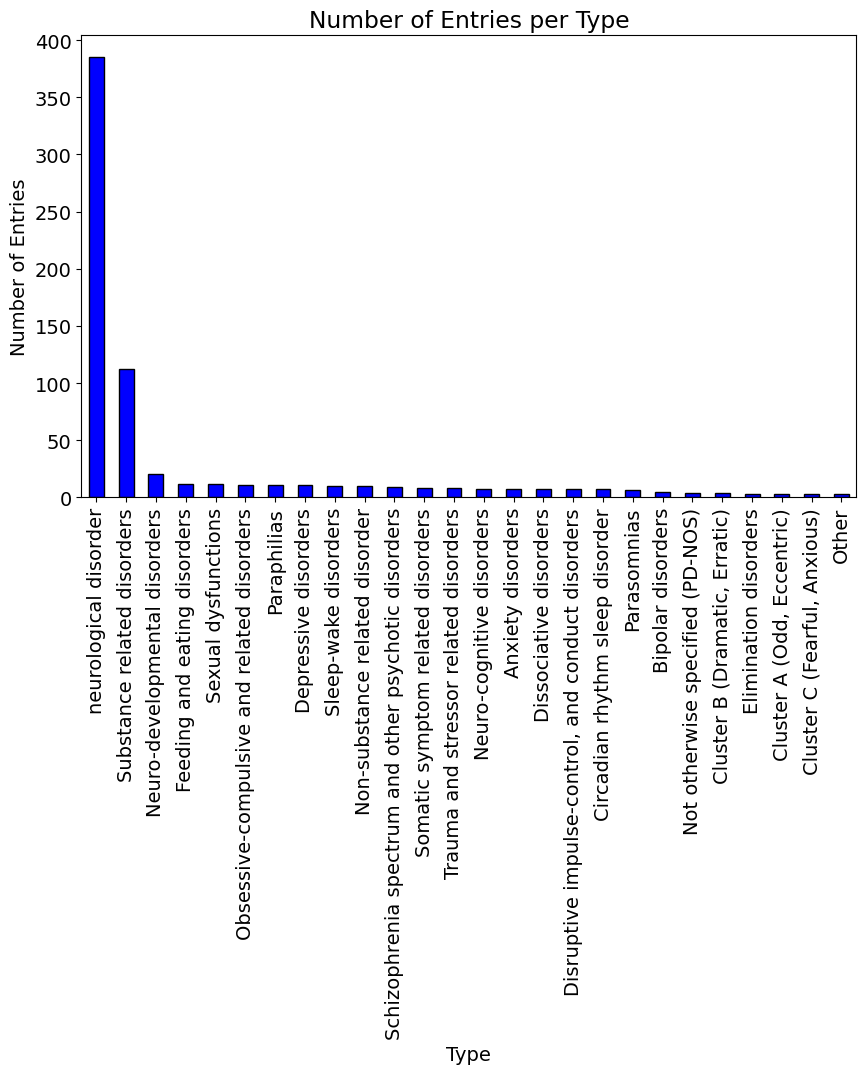

In [68]:


# Count the number of entries for each type
entries_per_type = data_t['type'].value_counts()



# Create a bar plot of the entries per type
plt.figure(figsize=(10,6))
entries_per_type.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Entries per Type')
plt.xlabel('Type')
plt.ylabel('Number of Entries')
plt.show()

C:\Users\Toni\AppData\Local\Temp\ipykernel_17660\2134839104.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_counts = data.applymap(word_count)


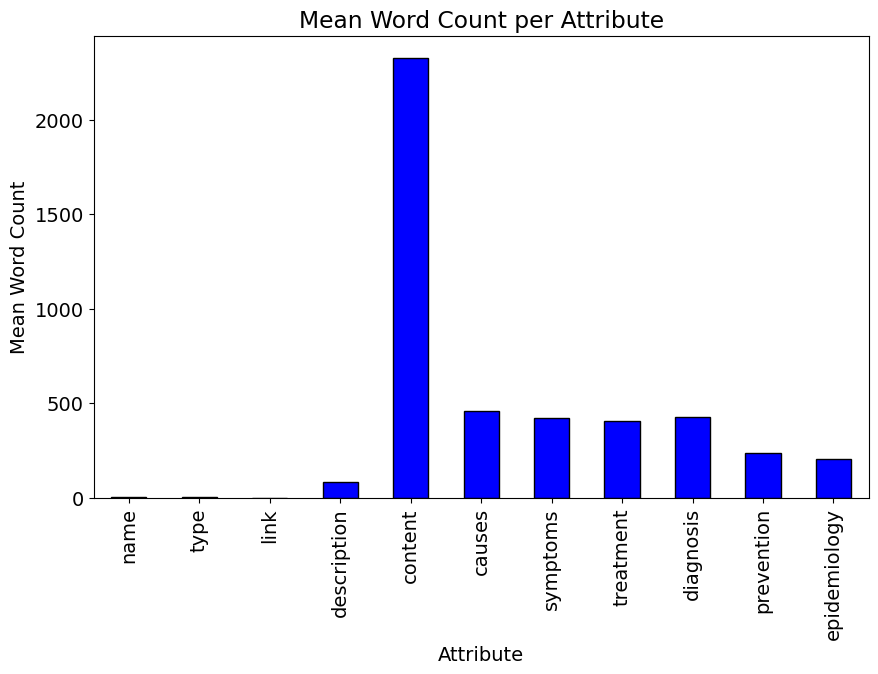

In [69]:
def word_count(text):
    # Check if the text is not NaN
    if pd.notna(text):
        # Calculate the word count
        return len(str(text).split())
    else:
        return np.nan

# Apply the function to each cell in the DataFrame
word_counts = data.applymap(word_count)

# Calculate the mean word count for each column, ignoring the NaN values
mean_word_counts = word_counts.mean()

# Plot the mean word count for each attribute
plt.figure(figsize=(10,6))
mean_word_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Mean Word Count per Attribute')
plt.xlabel('Attribute')
plt.ylabel('Mean Word Count')
plt.show()


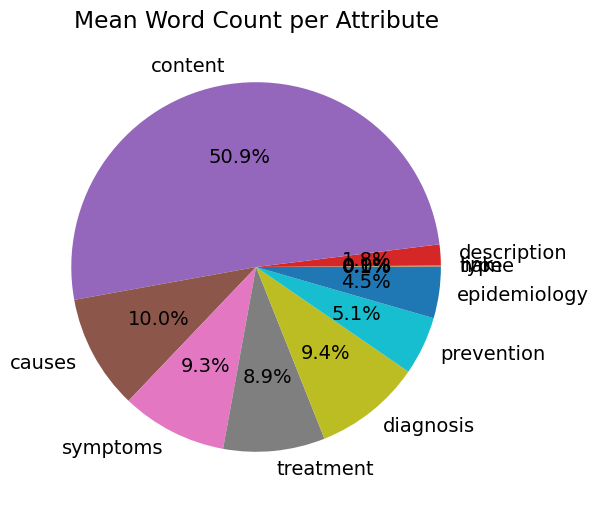

In [70]:


# Plot the mean word count for each attribute as a pie chart
plt.figure(figsize=(10,6))
plt.pie(mean_word_counts, labels = mean_word_counts.index, autopct='%1.1f%%')
plt.title('Mean Word Count per Attribute')
plt.show()

In [71]:

# Calculate the number of empty fields in the DataFrame
num_empty_fields = data.isnull().sum().sum()

# Print the number of empty fields
print(num_empty_fields)

2316


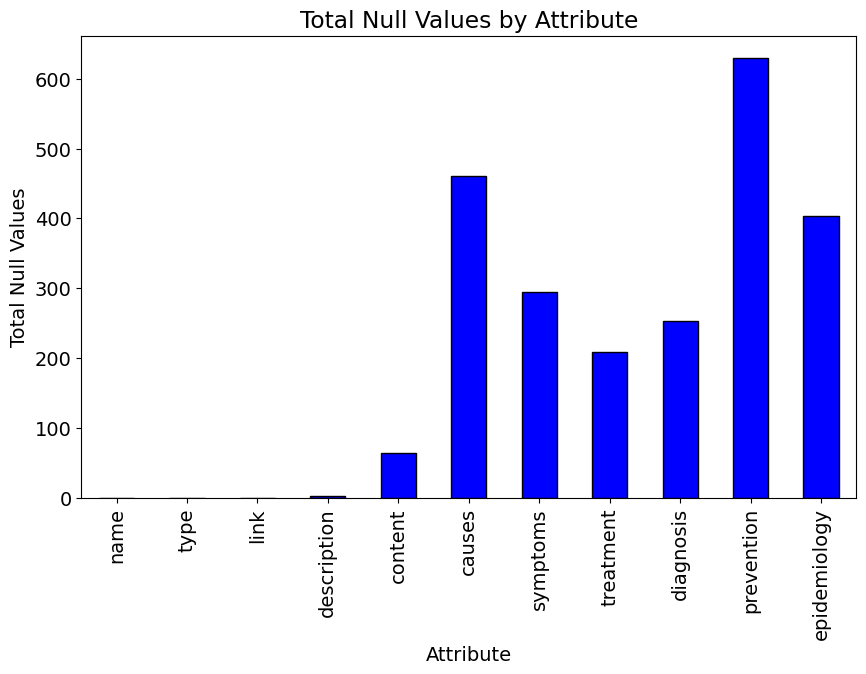

In [72]:
# Create a new DataFrame where each cell is either True (if the original cell is null) or False
is_null_df = data.isnull()

# Sum the True values in each column to get the number of null values in each column
num_null_values = is_null_df.sum()

# Create a bar plot of the total null values by attribute
plt.figure(figsize=(10,6))
num_null_values.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Total Null Values by Attribute')
plt.xlabel('Attribute')
plt.ylabel('Total Null Values')
plt.show()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Toni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


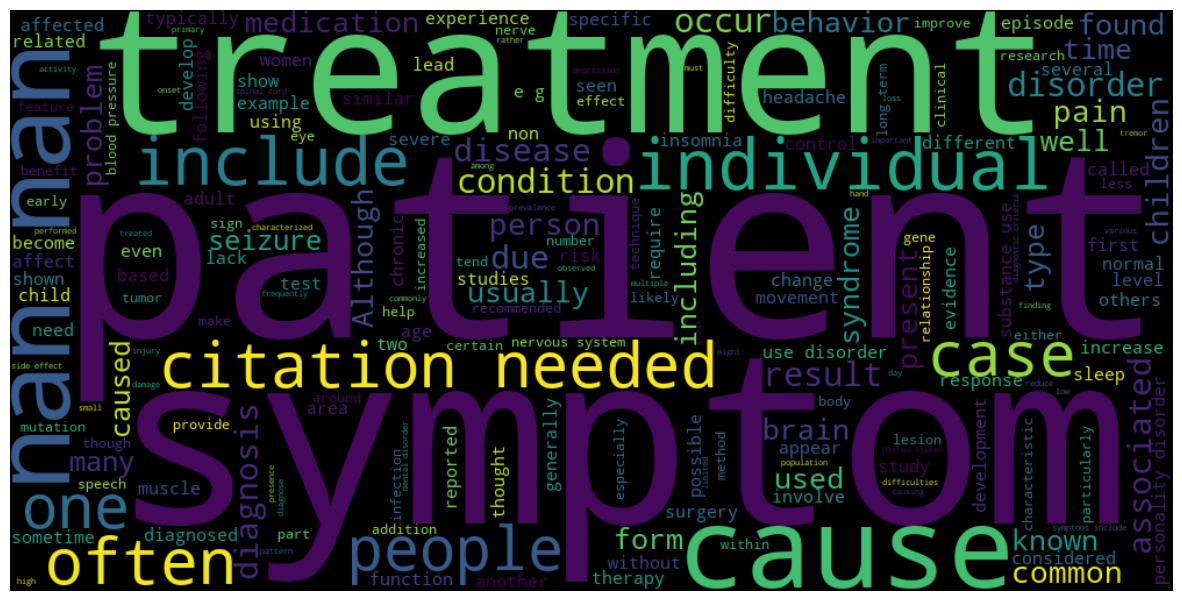

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('punkt_tab')




#Text Analaysis 

# Select the text columns
text_columns = data_t[['causes', 'description', 'diagnosis','epidemiology','treatment','symptoms', 'prevention']]

# Concatenate the values in each row
all_text = text_columns.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


# Get the list of stop words in English
stop_words = stopwords.words('english') + ["may"]

def remove_stopwords(text):
    # Split the text into words
    words = text.split()
    
    # Remove any stop words
    words = [word for word in words if word not in stop_words]
    
    # Join the words back into a single string and return it
    return ' '.join(words)

# Apply the function to your text data
all_text = all_text.apply(remove_stopwords)

wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_text))
print(wordcloud)
# Display the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [74]:
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import string

# Get the list of stop words in English
stop_words = stopwords.words('english') + ["may", "The","In"] 

# Select the text columns
text_columns = data_t[['causes', 'description', 'diagnosis','epidemiology','treatment','symptoms', 'prevention']]

# Concatenate the text columns into a single string for each row
data_t['all_text'] = text_columns.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Group by 'type' and concatenate all the text for each group
grouped_text = data_t.groupby('type')['all_text'].apply(lambda x: ' '.join(x))

# Initialize a dictionary to hold the top words for each type
top_words = {}

# For each type
for type, text in grouped_text.items():
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Count the frequency of each word
    word_freq = Counter(words)

    # Get the top 10 words
    top = word_freq.most_common(10)

    # Add the top words to the dictionary
    top_words[type] = top

# Print the top words for each type
for type, words in top_words.items():
    print(f"Type: {type}")
    for word, freq in words:
        print(f"    {word}: {freq}")


Type: Anxiety disorders
    anxiety: 159
    panic: 153
    disorder: 137
    therapy: 74
    children: 72
    treatment: 69
    people: 63
    also: 57
    symptoms: 56
    child: 55
Type: Bipolar disorders
    disorder: 84
    bipolar: 66
    symptoms: 51
    bpii: 49
    depressive: 46
    mood: 44
    episode: 41
    episodes: 36
    hypomanic: 35
    patients: 35
Type: Circadian rhythm sleep disorder
    sleep: 395
    insomnia: 124
    time: 83
    disorder: 71
    melatonin: 68
    light: 54
    circadian: 53
    treatment: 51
    patients: 49
    use: 48
Type: Cluster A (Odd, Eccentric)
    personality: 83
    disorder: 71
    people: 67
    szpd: 59
    schizoid: 45
    social: 33
    stpd: 31
    others: 29
    also: 27
    disorders: 24
Type: Cluster B (Dramatic, Erratic)
    bpd: 188
    disorder: 150
    personality: 140
    individuals: 99
    aspd: 87
    disorders: 80
    emotional: 70
    people: 55
    also: 55
    behavior: 55
Type: Cluster C (Fearful, Anxious)
    p

+----+------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+
|    | type                                                 | top words                                                                                                          |
|----+------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------|
|  0 | Anxiety disorders                                    | anxiety, panic, disorder, therapy, children, treatment, people, also, symptoms, child                              |
|  1 | Bipolar disorders                                    | disorder, bipolar, symptoms, bpii, depressive, mood, episode, episodes, hypomanic, patients                        |
|  2 | Circadian rhythm sleep disorder                      | sleep, insomnia, time, disorder, melatonin,

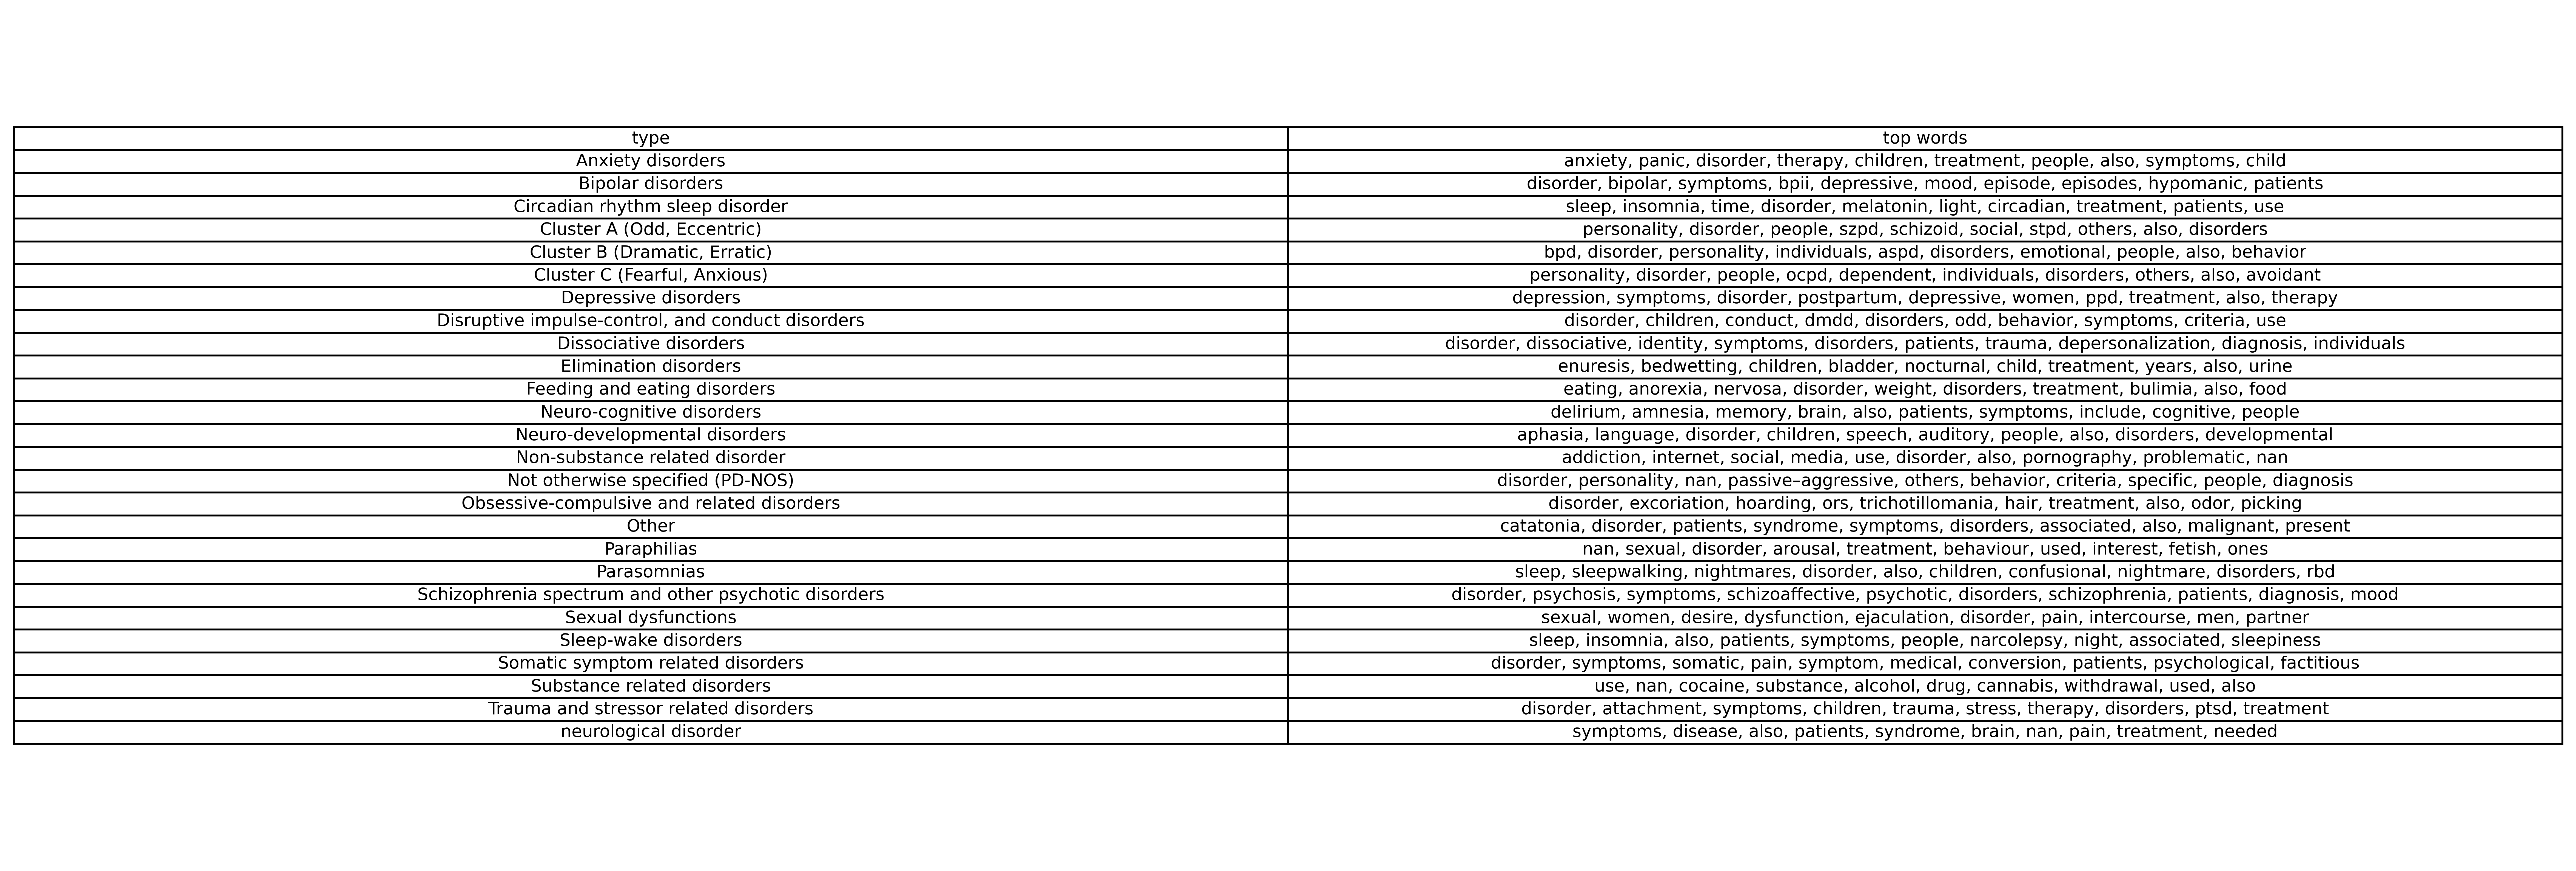

In [75]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Increase the font size
plt.rcParams['font.size'] = 14

# Initialize an empty DataFrame to hold the top words for each type
top_words_list = []

# For each type
for type, text in grouped_text.items():
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Count the frequency of each word
    word_freq = Counter(words)

    # Get the top 10 words
    top = word_freq.most_common(10)

    # Create a new row with the 'type' and the top 10 words
    new_row = {'type': type}
    top_row = ""
    for i, (word, freq) in enumerate(top):
        if i != 0:
            top_row += ", "
        top_row += word

    new_row["top words"] = top_row

    # Append the new row to the DataFrame
    top_words_list.append(new_row)

top_words_df = pd.DataFrame(top_words_list)

# Print the first ten rows of the DataFrame in a pretty table
print(tabulate(top_words_df, headers='keys', tablefmt='psql'))

# Save the DataFrame as a picture
fig, ax =plt.subplots(figsize=(24,8),dpi=500)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=top_words_df.values,colLabels=top_words_df.columns, cellLoc = 'center', loc='center')

plt.savefig('top_words_table.png',dpi=500)